In [1]:
%matplotlib inline

In [2]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolplanck')

from halotools.empirical_models import PrebuiltSubhaloModelFactory
model = PrebuiltSubhaloModelFactory('behroozi10')

model.populate_mock(halocat)

In [35]:
mask = model.mock.galaxy_table['stellar_mass'] > 10**10.5
source_galaxies = model.mock.galaxy_table[mask]
host_halo_mask = source_galaxies['halo_upid'] == -1
source_halos = source_galaxies[host_halo_mask]

target_halos = halocat.halo_table[halocat.halo_table['halo_upid'] == -1]

In [42]:
from galsampler import halo_bin_indices

mhost_bins = np.logspace(10.5, 15.25, 25)

source_halos['bin_number'] = halo_bin_indices(mass=(source_halos['halo_mvir_host_halo'], mhost_bins))
target_halos['bin_number'] = halo_bin_indices(mass=(target_halos['halo_mvir_host_halo'], mhost_bins))

In [43]:
# def source_galaxy_selection_indices(source_galaxies, source_halos, 
#                     target_halos, nhalo_min, *bins):
#     """
#     """
#     pass

In [44]:
from galsampler.end_to_end import source_galaxy_selection_indices

source_galaxies_colnames=dict(host_halo_id='halo_hostid')
nhalo_min = 25
indices = source_galaxy_selection_indices(source_galaxies, source_halos, 
                    target_halos, nhalo_min, mpeak_bins, 
                    source_galaxies_colnames=source_galaxies_colnames)

In [45]:
sample = source_galaxies[indices]


In [46]:
print(sample.keys())

['halo_upid', 'halo_hostid', 'halo_mpeak', 'halo_x', 'halo_y', 'halo_id', 'halo_z', 'halo_vx', 'halo_vy', 'halo_vz', 'halo_rvir', 'halo_mvir', 'halo_mvir_host_halo', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'galid', 'stellar_mass', 'bin_number', 'richness']


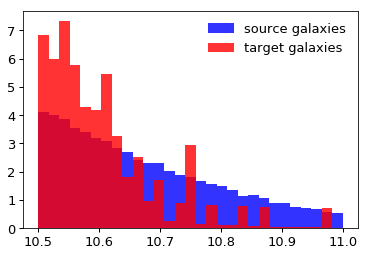

In [48]:
fig, ax = plt.subplots(1, 1)

sm_bins = np.linspace(10.5, 11, 30)
__=ax.hist(np.log10(source_galaxies['stellar_mass']), normed=True, bins=sm_bins, 
          alpha=0.8, color='blue', label='source galaxies')
__=ax.hist(np.log10(sample['stellar_mass']), normed=True, bins=sm_bins, 
          alpha=0.8, color='red', label='target galaxies')

legend = ax.legend()